<a href="https://colab.research.google.com/github/wilsenmokodaser/Logistic_Regression_Model/blob/main/BForcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1️⃣ Import Library yang Diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 2️⃣ Load Data dari Google Colab (Gantilah jika menggunakan Google Drive)
file_path = "/content/drive/MyDrive/Data/Revenue.xlsx"  # Ubah path jika perlu
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Sheet1")

In [ ]:
# 3️⃣ Eksplorasi Data
print("\n🔹 Data Awal:")
print(df.head())
print("\n🔹 Info Dataset:")
df.info()


🔹 Data Awal:
                                               Payer    Emergency  ...     Inpatient   Outpatient
0                              BIOMEDILAB KLINIK, PT  2766600.000  ...  2.875250e+06    2806350.0
1            PLN (PERSERO) DISTRIBUSI JAWA TIMUR, PT  4940845.512  ...  4.945633e+06    4787641.0
2                                 PLN UIP MALUKU, PT  4094383.295  ...  6.614930e+06    1124925.0
3                            ARTA BOGA CEMERLANG, PT  2274750.000  ...  2.297498e+06    2297497.5
4   LIPPO GENERAL INSURANCE, PT - MEARES SOPUTAN ...  9056901.000  ...  3.359739e+08  214292169.0

[5 rows x 5 columns]

🔹 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Payer           219 non-null    object 
 1   Emergency       219 non-null    float64
 2   Health Checkup  219 non-null    float64
 3   Inpatient       219 non-n

In [ ]:
# 4️⃣ Hapus Kolom yang Tidak Diperlukan (Kolom Teks 'Payer')
df_numeric = df.drop(columns=['Payer'])

In [ ]:
# 5️⃣ Buat Label: High Revenue (1) vs Low Revenue (0)
df_numeric['Total_Revenue'] = df_numeric.sum(axis=1)
median_revenue = df_numeric['Total_Revenue'].median()
df_numeric['Revenue_Class'] = (df_numeric['Total_Revenue'] > median_revenue).astype(int)

# Salin kolom Revenue_Class dan Total_Revenue dari df_numeric ke df
df['Revenue_Class'] = df_numeric['Revenue_Class']
df['Total_Revenue'] = df_numeric['Total_Revenue']

# 6️⃣ Tampilkan Nama-Nama Payer Sebelum Prediksi dalam Tabel
print("\n🔹 Payer dengan Low Revenue (Sebelum Prediksi):")
low_revenue_df = df[df['Revenue_Class'] == 0][['Payer', 'Total_Revenue']]
print(low_revenue_df.to_string(index=False))

print("\n🔹 Payer dengan High Revenue (Sebelum Prediksi):")
high_revenue_df = df[df['Revenue_Class'] == 1][['Payer', 'Total_Revenue']]
print(high_revenue_df.to_string(index=False))

# Hitung jumlah Payer sebelum prediksi
low_revenue_count_before = len(low_revenue_df)
high_revenue_count_before = len(high_revenue_df)
print(f"\n🔹 Jumlah Payer Low Revenue Sebelum Prediksi: {low_revenue_count_before}")
print(f"🔹 Jumlah Payer High Revenue Sebelum Prediksi: {high_revenue_count_before}")


🔹 Payer dengan Low Revenue (Sebelum Prediksi):
                                                                Payer  Total_Revenue
                                                BIOMEDILAB KLINIK, PT   1.109820e+07
                              PLN (PERSERO) DISTRIBUSI JAWA TIMUR, PT   1.956549e+07
                                                   PLN UIP MALUKU, PT   1.577898e+07
                                              ARTA BOGA CEMERLANG, PT   9.144495e+06
    LIPPO GENERAL INSURANCE, PT - NEWCREST HALMAHERA MINING (NHM), PT   3.689724e+07
                                MATAHARI PUTRA PRIMA TBK, PT (TENANT)   4.235220e+06
             CHUBB GENERAL INSURANCE INDONESIA (CHUBB) - CYNERGY CARE   1.874772e+07
                                           AAI, PT - KAWAN LAMA GROUP   1.003001e+07
                         ADM-ASURANSI SOMPO JAPAN NIPPONKOA INDONESIA   3.423374e+07
                                                      ADM-HANWHA LIFE   2.206204e+07
                 

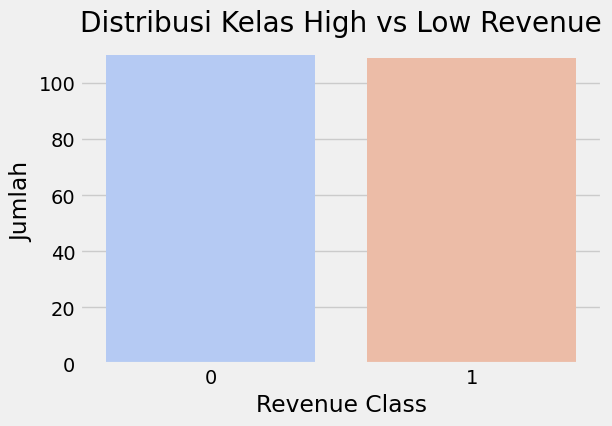

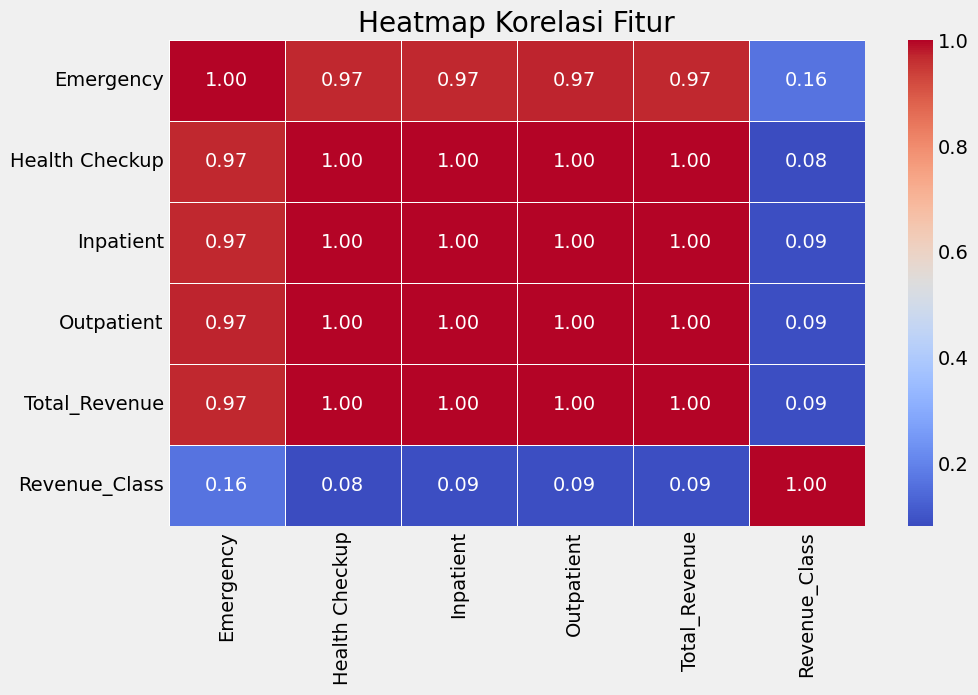

In [ ]:
# 7️⃣ Pisahkan Fitur (X) dan Target Label (y)
X = df_numeric.drop(columns=['Total_Revenue', 'Revenue_Class'])
y = df_numeric['Revenue_Class']

# 🔹 Tampilkan distribusi kelas dengan plot
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette='coolwarm')
plt.title('Distribusi Kelas High vs Low Revenue')
plt.xlabel('Revenue Class')
plt.ylabel('Jumlah')
plt.show()

# 🔹 Tampilkan Heatmap Korelasi
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [ ]:
# 8️⃣ Bagi Data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 9️⃣ Tangani Nilai NaN dengan Menggunakan Median
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# 🔟 Normalisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [ ]:
#Latih Model Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# 1️⃣2️⃣ Prediksi pada Data Uji
y_pred = model.predict(X_test_scaled)

In [ ]:
# 1️⃣3️⃣ Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# 1️⃣4️⃣ Tampilkan Hasil
print(f"\n✅ Akurasi Model: {accuracy * 100:.2f}%")
print("\n🔹 Confusion Matrix:")
print(conf_matrix)
print("\n🔹 Classification Report:")
print(class_report)


✅ Akurasi Model: 79.55%

🔹 Confusion Matrix:
[[21  0]
 [ 9 14]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        21
           1       1.00      0.61      0.76        23

    accuracy                           0.80        44
   macro avg       0.85      0.80      0.79        44
weighted avg       0.86      0.80      0.79        44



In [ ]:
# 1️⃣5️⃣ Tampilkan Nama-Nama Payer dan Revenue Sebelum & Setelah Prediksi
print("\n🔹 Payer dengan Low Revenue (Sebelum Prediksi):")
print(low_revenue_df.to_string(index=False))

print("\n🔹 Payer dengan High Revenue (Sebelum Prediksi):")
print(high_revenue_df.to_string(index=False))

# Buat DataFrame Hasil Prediksi
df_predicted = df.copy()
df_predicted['Predicted_Revenue_Class'] = model.predict(scaler.transform(imputer.transform(X)))

print("\n🔹 Payer dengan Low Revenue (Setelah Prediksi):")
low_revenue_pred_df = df_predicted[df_predicted['Predicted_Revenue_Class'] == 0][['Payer', 'Total_Revenue']]
print(low_revenue_pred_df.to_string(index=False))

print("\n🔹 Payer dengan High Revenue (Setelah Prediksi):")
high_revenue_pred_df = df_predicted[df_predicted['Predicted_Revenue_Class'] == 1][['Payer', 'Total_Revenue']]
print(high_revenue_pred_df.to_string(index=False))

# Hitung jumlah Payer setelah prediksi
low_revenue_count_after = len(low_revenue_pred_df)
high_revenue_count_after = len(high_revenue_pred_df)
print(f"\n🔹 Jumlah Payer Low Revenue Setelah Prediksi: {low_revenue_count_after}")
print(f"🔹 Jumlah Payer High Revenue Setelah Prediksi: {high_revenue_count_after}")


🔹 Payer dengan Low Revenue (Sebelum Prediksi):
                                                                Payer  Total_Revenue
                                                BIOMEDILAB KLINIK, PT   1.109820e+07
                              PLN (PERSERO) DISTRIBUSI JAWA TIMUR, PT   1.956549e+07
                                                   PLN UIP MALUKU, PT   1.577898e+07
                                              ARTA BOGA CEMERLANG, PT   9.144495e+06
    LIPPO GENERAL INSURANCE, PT - NEWCREST HALMAHERA MINING (NHM), PT   3.689724e+07
                                MATAHARI PUTRA PRIMA TBK, PT (TENANT)   4.235220e+06
             CHUBB GENERAL INSURANCE INDONESIA (CHUBB) - CYNERGY CARE   1.874772e+07
                                           AAI, PT - KAWAN LAMA GROUP   1.003001e+07
                         ADM-ASURANSI SOMPO JAPAN NIPPONKOA INDONESIA   3.423374e+07
                                                      ADM-HANWHA LIFE   2.206204e+07
                 